In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.drop(columns=['PassengerId','Name','Ticket','Fare'],inplace=True)

In [4]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [5]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
train.shape

(891, 8)

In [8]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train['Cabin']=train['Cabin'].fillna('Unknown')
train['Age']=train['Age'].fillna(np.mean(train['Age']))
train['Embarked'].replace(np.nan,-1,inplace=True)

In [10]:
nan_feature=['Embarked']
for nans in nan_feature:
    train[nans] =  train[nans].astype('category')
imputer=SimpleImputer(missing_values=-1, strategy='most_frequent')
train[nan_feature]=imputer.fit_transform(train[nan_feature])

In [11]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
dtype: int64

In [12]:
cat_cols=['Sex','Cabin','Embarked']
encoder=LabelEncoder()
for label in cat_cols:
    train[label]=encoder.fit_transform(train[label])

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,147,2
1,1,1,0,38.0,1,0,81,0
2,1,3,0,26.0,0,0,147,2
3,1,1,0,35.0,1,0,55,2
4,0,3,1,35.0,0,0,147,2


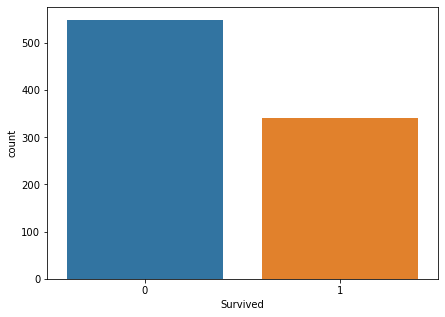

In [14]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.countplot(train['Survived'])
plt.show()

In [15]:
test.shape

(418, 11)

In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
new_test=test.copy()

In [19]:
new_test.drop(columns=['PassengerId','Name','Ticket','Fare'],inplace=True)
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [20]:
new_test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [21]:
new_test['Cabin']=new_test['Cabin'].fillna('Unknown')
new_test['Age']=new_test['Age'].fillna(np.mean(new_test['Age']))

In [24]:
new_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    0
dtype: int64

In [25]:
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,Unknown,Q
1,3,female,47.0,1,0,Unknown,S
2,2,male,62.0,0,0,Unknown,Q
3,3,male,27.0,0,0,Unknown,S
4,3,female,22.0,1,1,Unknown,S


In [26]:
cat_cols=['Sex','Cabin','Embarked']
encoder=LabelEncoder()
for label in cat_cols:
    new_test[label]=encoder.fit_transform(new_test[label])

In [27]:
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,1,34.5,0,0,76,1
1,3,0,47.0,1,0,76,2
2,2,1,62.0,0,0,76,1
3,3,1,27.0,0,0,76,2
4,3,0,22.0,1,1,76,2


In [36]:
def find_best_model_score_and_params(x,y):
    model_grid={'LogisticRegression':{
        'model':LogisticRegression(),
        'parameters':{
            'penalty':['l1','l2','elasticnet','none'],
            'multi_class':['auto','ovr','multinomial']
        }
    },
            'RandomForestClassifier':{
                'model':RandomForestClassifier(),
                'parameters':{
                    'n_estimators':range(10,200),
                    'criterion':['gini','entropy']
                }
            },
            'DecisionTreeClassifier':{
                'model':DecisionTreeClassifier(),
                'parameters':{
                    'criterion':['gini','entropy'],
                    'splitter':['best','random']
                }
            },
                'GradientBoostingClassifier':{
                    'model':GradientBoostingClassifier(),
                    'parameters':{
                        'loss':['deviance','exponential'],
                        'learning_rate':[0.001,0.01,0.1],
                        'n_estimators':range(10,200)
                    }
                }
           }
    model_scores=[]
    for model_name,mdl in model_grid.items():
        grid_search=GridSearchCV(mdl['model'],mdl['parameters'],cv=5,return_train_score=False)
        grid_search.fit(X , y)
        model_scores.append({
            'model':model_name,
            'score':grid_search.best_score_,
            'parameters':grid_search.best_params_
        })
    return pd.DataFrame(model_scores,columns=['model','score','parameters'])

In [28]:
X=train.drop('Survived',axis=1)
Y=train['Survived']
find_best_model_score_and_params(X,Y)

In [30]:
gbc_model=GradientBoostingClassifier(learning_rate=0.1,loss='exponential',n_estimators=52).fit(X,Y)
gbc_model.score(X,Y)
prediction=gbc_model.predict(new_test)

In [31]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [32]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":prediction})
submission.to_csv('submission.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
